## **Table of Contents**
* [Vectors and Matrices](#1)
* [States, Measurements and Operations](#2)

<a id='1'></a>
## Vectors and Matrices

 In Python, matrix and vector computations can be performed using the `array`  class from the  `NumPy`  library (which includes many additional components for numerical computation).

Here is an example of a code cell that defines two vectors, `ket0` and `ket1`, corresponding to the qubit state vectors $∣0⟩$ and $∣1⟩$, and displays their average.

In [16]:
import numpy as np

In [17]:
# Qubit state vectors:  ∣0⟩ and ∣1⟩
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

# Average of ∣0⟩ and ∣1⟩
display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

We can also use `array`  to create matrices that represent operations.

In [18]:
 # Matrices (i.e. operations)
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 1], [1, 0]])

# Average of M1 and M2
display(M1 / 2 + M2 / 2)

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the `matmul` function from  `NumPy`:

In [19]:
# Matrix multiplication
display(np.matmul(M1, ket1))
display(np.matmul(M1, M2))
display(np.matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

<a id='2'></a>
## States, Measurements and Operations

### Defining and displaying state vectors

Qiskit's `Statevector` class provides functionality for defining and manipulating quantum state vectors. The following code cell imports the `Statevector` class and defines a few vectors using it. 

In [20]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

In [21]:
# Defining state vectors with QisKit's Statevector class
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


The `Statevector` class provides a `draw`  method for displaying state vectors, including `latex` and `text` options for different visualizations, as this code cell demonstrates:

In [22]:
# Visualising or "drawing" QisKit's Statevectors
display(u.draw("latex"))
display(v.draw("latex"))
display(w.draw("text"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[0.33333333+0.j,0.66666667+0.j]

The `Statevector` class also includes the `is_valid` method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):

In [23]:
# Checking if the quantum states are valid (their Euclidian norms equal to 1)
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

### Simulating measurements using `Statevector`

Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the `measure` method from the `Statevector` class.

First, we create a qubit state vector `v` and then display it.

In [24]:
# Defining a Qubit vector
v = Statevector([(1 + 2.0j) / 3, -2 / 3])

display(v.draw("latex"))

<IPython.core.display.Latex object>

Next, running the `measure` method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [25]:
# Simulate a standard basis measurement
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results. Helpfully, `Statevector` also comes with a `sample_counts` method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector `v` 1000 times, which (with high probability) results in the outcome 0 approximately 5 out of every 9 (or about 556 of the 1000 trials) and the the outcome 1 approximately 4 out of every 9 times (or about 444 out of the 1000 trials). The cell also demonstrates the `plot_histogram`  function for visualizing the results.

{'0': 580, '1': 420}

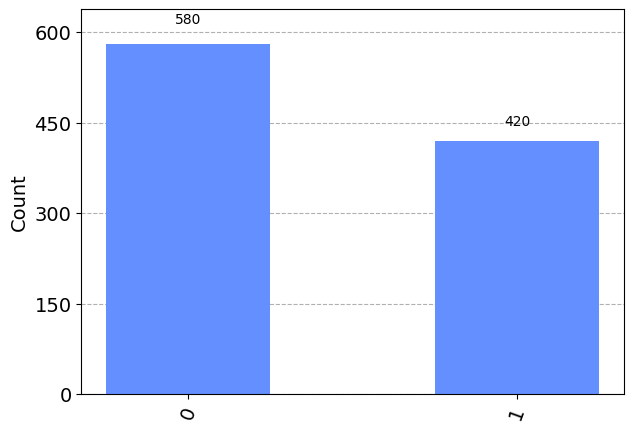

In [26]:
from qiskit.visualization import plot_histogram

# Simulate 1000 standard basis measurements (expect approx 556/1000 to be 0 and 444/1000 to be 1)
v_statistics = v.sample_counts(1000)
display(v_statistics)
plot_histogram(v_statistics)

### Performing operations with `Operator` and `Statevector`

Unitary operations can be defined and performed on state vectors in Qiskit using the `Operator` class, as in the example that follows.

In [27]:
from qiskit.quantum_info import Operator

# Pauli operators
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])   
Z = Operator([[1, 0], [0, -1]])

# Hadamard operator
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])

# Phase operators
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

# Quantum state vector
v = Statevector([1, 0])

# Performing operations on the state vector (i.e. evolving the quantum system)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

### Looking ahead to quantum circuits

Quantum circuits won't be formally introduced until Lesson 3, but we can nevertheless experiment with composing qubit unitary operations using Qiskit's `QuantumCircuit` class. In particular, we may define a quantum circuit (which in this case will simply be a sequence of unitary operations performed on a single qubit) as follows.

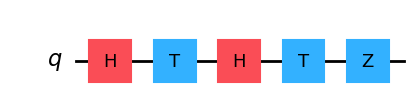

In [28]:
from qiskit import QuantumCircuit

# Build a quantum circuit (which in this case will simply be a sequence of unitary operations performed on a single qubit)
circuit = QuantumCircuit(1)

# Adding operations to the circuit
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

# Visualising the circuit
circuit.draw(output='mpl')

The operations are applied sequentially, starting on the left and ending on the right in the figure. Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations.

In [29]:
# Initialise a quantum state vector
ket0 = Statevector([1, 0])

# Evolve the state according to the sequence of operations in the circuit
v = ket0.evolve(circuit)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Finally, let's simulate the result of running this experiment (i.e., preparing the state $∣0⟩$, applying the sequence of operations represented by the circuit, and measuring) 4000 times.

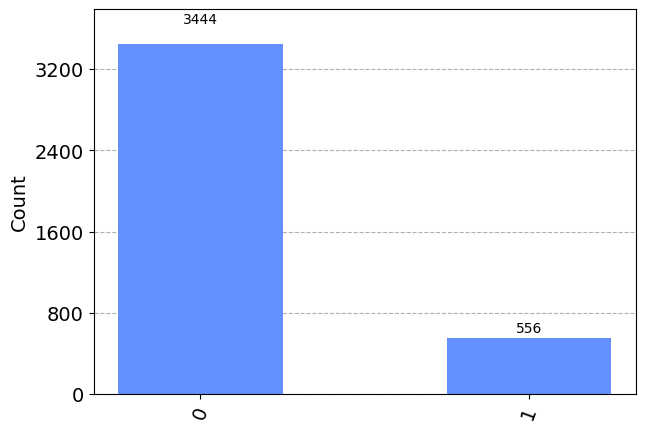

In [30]:
# Simulate the result of running this experiment 4000 times
v_statistics = v.sample_counts(4000)
plot_histogram(v_statistics)